In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
load("environment/brain_sim_nodtu/mode=gc_bias/mapDf.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/updated/yNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/updated/comp_trees/dfInfRV.RData")

In [2]:
trFile <- "../brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/out_term_hirak/cluster_nwk.txt"
tr <- read.tree(trFile)
tree <- mergeTree(tr, se = mapDf)

In [76]:
depth <- node.depth(tree,2)
table(depth)
modDep <- depth
modDep[modDep > 6] = 7

depth
     1      2      3      4      5      6      7      8      9     10     11 
129605   9933   3811   1691    711    332    150     62     26     15     10 
    12     13     14     15     16     17     18     19     20     21     22 
     7      5      3      2      2      1      1      1      1      1      1 

In [50]:
sum(!tree$tip %in% rownames(yNS))
mOB <- mergeLeaves(tree = tree, ySwish = yNS)
tree <- mOB[["tree"]]
y <- mOB[["ySwish"]]

[1] 0

[1] "Missing txps 103184"


In [52]:
yAgg <- prepSwish(tree, y)
yAgg <- computeInfRV(yAgg, meanVariance=F)

In [78]:
dfInfRV <- rbind(dfInfRV,data.frame(infRV = mcols(yAgg)[["meanInfRV"]], depth = depth, modDep = modDep, type="Cons_Thr"))

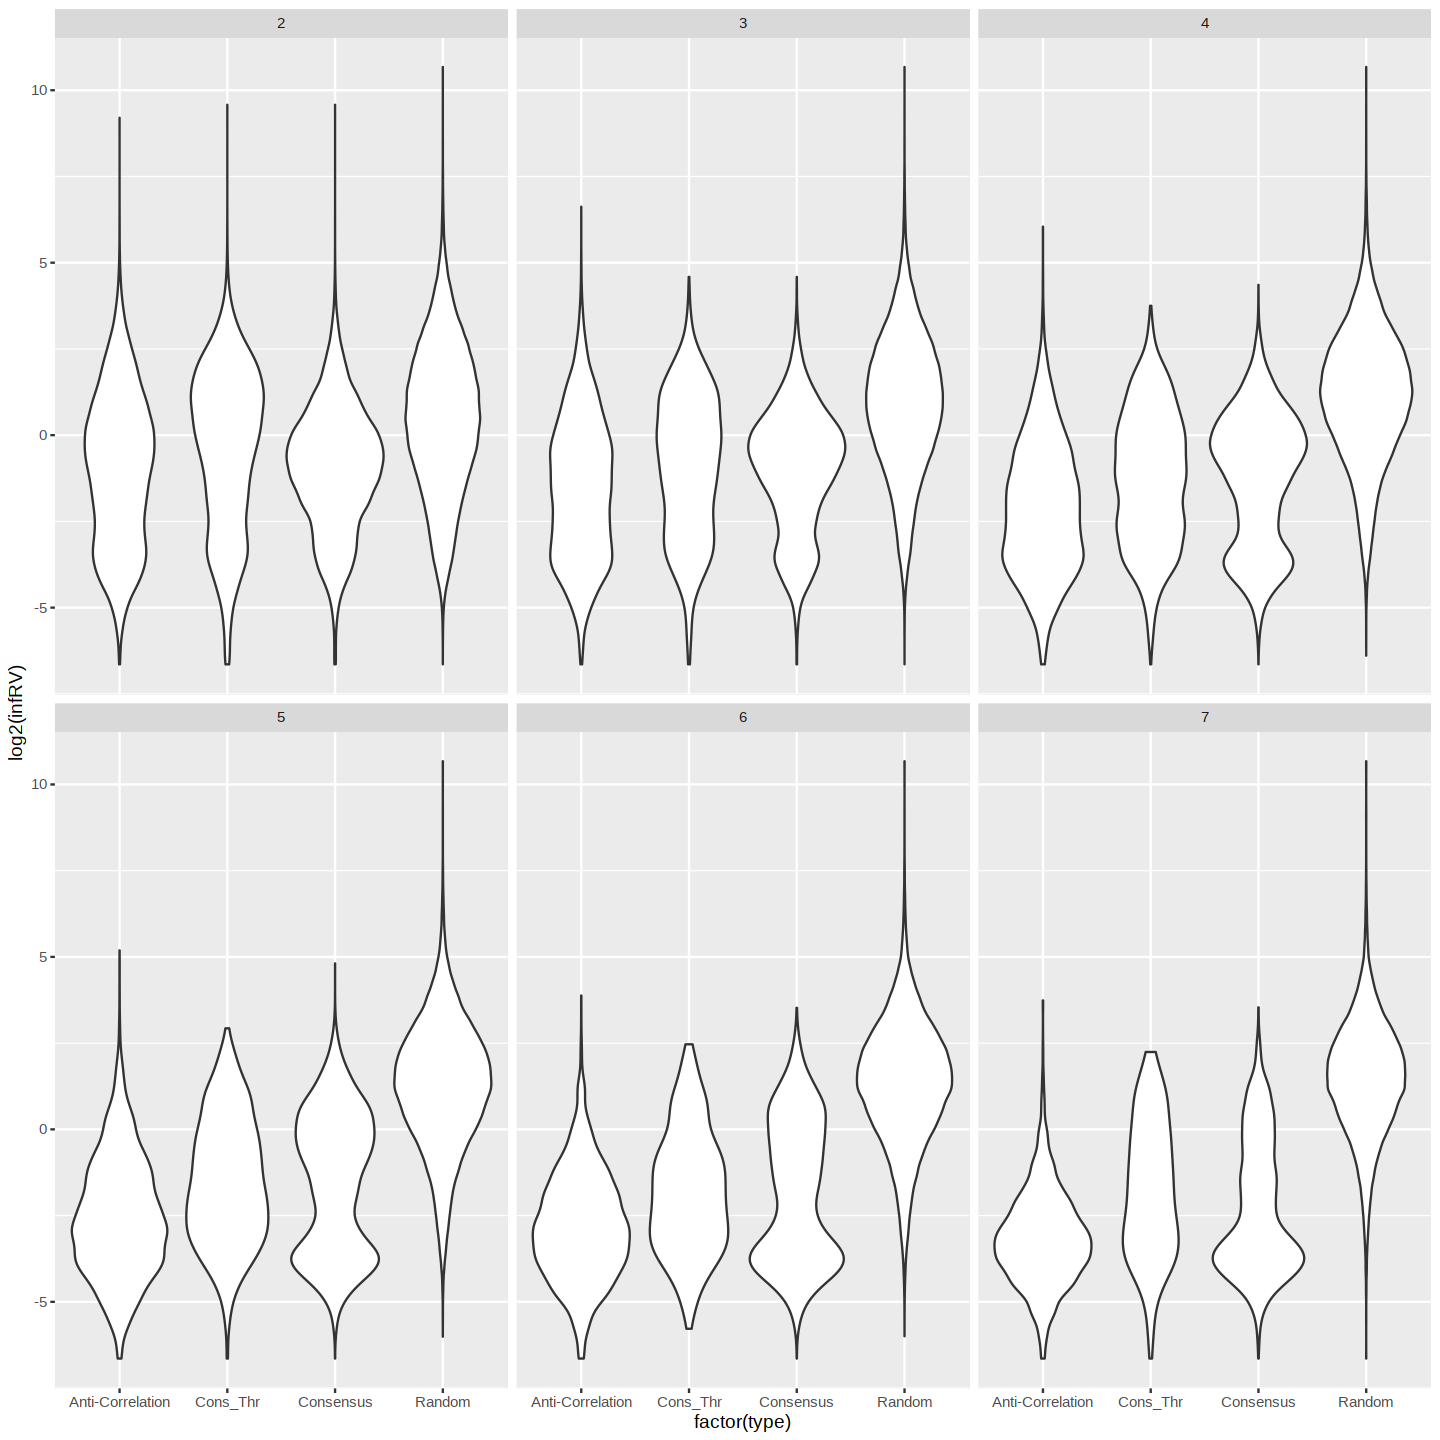

In [79]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1) %>% ggplot(aes(x=factor(type), y=log2(infRV))) + geom_violin() + facet_wrap(vars(modDep))

In [85]:
f <- function(m, p) {
    mean(m < p)
}
dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep) %>% summarise(m = f(infRV,1))
dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep) %>% summarise(median(infRV))

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.


type,modDep,m
<chr>,<dbl>,<dbl>
Anti-Correlation,2,0.6514433
Anti-Correlation,3,0.7615762
Anti-Correlation,4,0.8543173
Anti-Correlation,5,0.9144385
Anti-Correlation,6,0.9577964
Anti-Correlation,7,0.9800000
Cons_Thr,2,0.5090104
Cons_Thr,3,0.6305432
Cons_Thr,4,0.7125961


`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.


type,modDep,median(infRV)
<chr>,<dbl>,<dbl>
Anti-Correlation,2,0.5373988
Anti-Correlation,3,0.3285520
Anti-Correlation,4,0.2103584
Anti-Correlation,5,0.1521982
Anti-Correlation,6,0.1316520
Anti-Correlation,7,0.1034915
Cons_Thr,2,0.9682355
Cons_Thr,3,0.5907024
Cons_Thr,4,0.4206948


## 